In [61]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as cx
import datetime
import geopandas as gpd
import scipy as sc
from colour import Color
import scipy.optimize as optimize
from pylab import *
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import os
import random
import matplotlib.colors as clrs
from matplotlib.colors import LinearSegmentedColormap
files = sorted(os.listdir())
print(files)

['.ipynb_checkpoints', 'Simra_Beinaheunfaelle_Konstanz_UTF8.csv', 'Simra_Beinaheunfaelle_Konstanz_UTF8_fixed.csv', 'Simra_Beinaheunfaelle_Konstanz_UTF8_fixed_2.csv', 'unfaelle_beinahe_cleaing_DF.ipynb', 'unfaelle_beinahe_plot.ipynb']


In [127]:
df = pd.read_csv("Simra_Beinaheunfaelle_Konstanz_UTF8_fixed_2.csv", sep = ",") 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["lon_fix"], df["lat_fix"]))
#print(gdf.head())

In [128]:
#incident: Art des Vorfalls:
#-5 = Dummy-Vorfall (wenn kein Vorfall eingestellt ist, wird dieser erstellt, um die Informationen zu bike, pLoc, childCheckBox und trailerCheckBox zu erhalten)
#0 = Nichts (Standardwert)
#1 = Zu dichtes Überholen
#2 = Jemand schert ein oder aus
#3 = Beinahe Unfall mit Rechts- oder Linksabbieger
#4 = Entgegenkommender Verkehrsteilnehmer
#5 = Dicht auffahren (Drängler)
#6 = Beinahe-Dooring (plötzlich öffnende Autotür)
#7 = Ausweichen vor Hindernis (z.B. Hund)
#8 = Sonstiges (bitte angeben)
# set coordinate reference system (CRS, EPSG:4326 is WSG84)

<IPython.core.display.Javascript object>


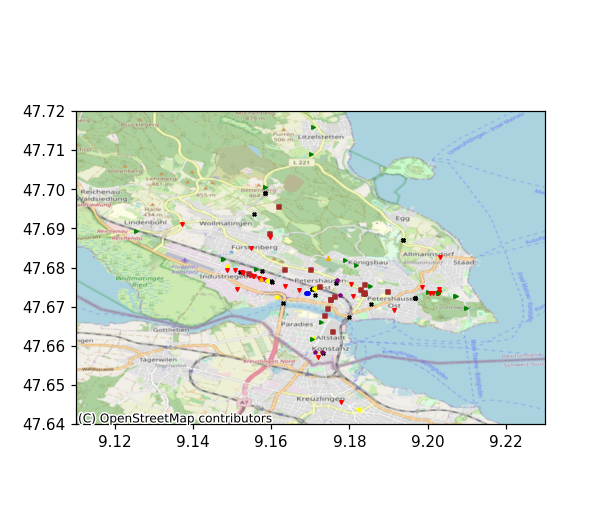

In [109]:
f, ax = subplots(1,1, figsize = (400/72,350/72))
clrs = ["pink", "red", "orange", "yellow", "green", "blue","purple", "brown","black"] 
#colors_shoen = ["tab:rot"]
gdf = gdf.set_crs(epsg = 4326)
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
n6 = 0
n7 = 0
n8 = 0
# convert OSM source    
#labels = ["Überholen", "Ausscheren", "Abbiegen", "Entgegen", "Dicht auf", "Tür", "Ausweichen", "Sonstiges"]
labels = (["v", "^", "<", ">", "o", "p", "s", "x"], ["Überholen", "Ausscheren", "Abbiegen", "Entgegen", "Dicht auf", "Tür", "Ausweichen", "Sonstiges"])
i = 0
while i < len(gdf["incident"]):
    if gdf["incident"][i] == 1: 
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[1], marker = "v", s = 5)
        i+=1
        n1+=1
    if gdf["incident"][i] == 2:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[2], marker = "^", s = 5)
        i+=1
        n2+=1
    if gdf["incident"][i] == 3:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[3], marker = "<", s = 5)
        i+=1
        n3=1
    if gdf["incident"][i] == 4:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[4], marker = ">", s = 5)
        i+=1
        n4+=1
    if gdf["incident"][i] == 5:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[5], marker = "o", s = 5)
        i+=1
        n5+=1
    if gdf["incident"][i] == 6:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[6], marker = "p", s = 5)
        i+=1
        n6+=1
    if gdf["incident"][i] == 7:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[7], marker = "s", s = 5)
        i+=1
        n7+=1
    if gdf["incident"][i] == 8:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, color = clrs[8], marker = "x", s = 5)
        i+=1
        n8+=1
    else:
        i+=1
#ax.legend(labels[0], labels[1],loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=8)
ax.set_ylim(47.640, 47.72)
ax.set_xlim(9.11, 9.23)
cx.add_basemap(ax, crs = gdf.crs, zoom = 13, source = cx.providers.OpenStreetMap.Mapnik)


<IPython.core.display.Javascript object>


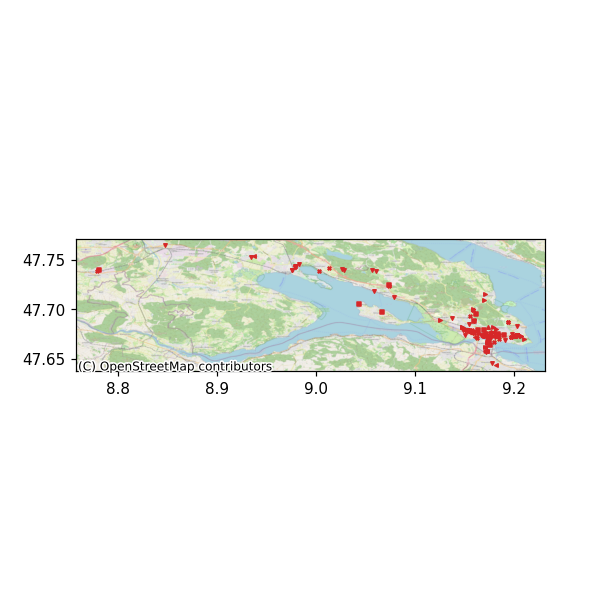

In [126]:
f, ax = subplots(1,1, figsize = (400/72,400/72))
clrs = ["pink", "tab:red", "tab:pink", "tab:green", "tab:blue","tab:purple", "tab:cyan","tab:olive", "tab:brown"] 

colors_shoen = ["tab:red"]
gdf = gdf.set_crs(epsg = 4326)
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
n6 = 0
n7 = 0
n8 = 0
# convert OSM source    
#labels = ["Überholen", "Ausscheren", "Abbiegen", "Entgegen", "Dicht auf", "Tür", "Ausweichen", "Sonstiges"]
labels = (["v", "^", "<", ">", "o", "p", "s", "x"], ["Überholen", "Ausscheren", "Abbiegen", "Entgegen", "Dicht auf", "Tür", "Ausweichen", "Sonstiges"])
i = 0
while i < len(gdf["incident"]):
    if gdf["incident"][i] == 1: 
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "v", s = 5)
        i+=1
        n1+=1
    if gdf["incident"][i] == 2:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "^", s = 5)
        i+=1
        n2+=1
    if gdf["incident"][i] == 3:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "<", s = 5)
        i+=1
        n3=1
    if gdf["incident"][i] == 4:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = ">", s = 5)
        i+=1
        n4+=1
    if gdf["incident"][i] == 5:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "o", s = 5)
        i+=1
        n5+=1
    if gdf["incident"][i] == 6:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "p", s = 5)
        i+=1
        n6+=1
    if gdf["incident"][i] == 7:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "s", s = 5)
        i+=1
        n7+=1
    if gdf["incident"][i] == 8:
        ax.scatter(gdf["lon_fix"][i], gdf["lat_fix"][i] ,alpha = 1, c = colors_shoen[0], marker = "x", s = 5)
        i+=1
        n8+=1
    else:
        i+=1
#ax.legend(labels[0], labels[1],loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=8)
#ax.set_ylim(47.640, 47.72)
#ax.set_xlim(9.13, 9.21)
cx.add_basemap(ax, crs = gdf.crs, zoom = 13, source = cx.providers.OpenStreetMap.Mapnik)


[50  4  1 17  2  5 21 27]


<IPython.core.display.Javascript object>


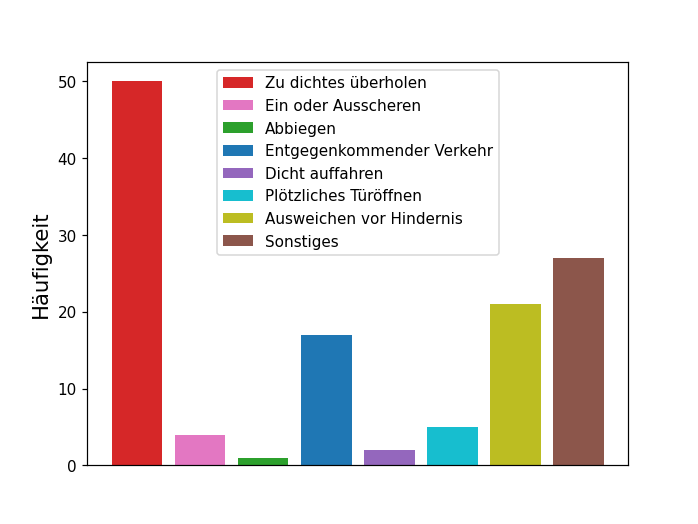

In [125]:
amount = np.array([n1, n2, n3,n4,n5,n6,n7,n8])
labels_bar = ["Zu dichtes überholen", "Ein oder Ausscheren", "Abbiegen", "Entgegenkommender Verkehr", "Dicht auffahren", "Plötzliches Türöffnen", "Ausweichen vor Hindernis", "Sonstiges"]
print(amount)
numb = np.array([1,2,3,4,5,6,7,8])
f, ax = subplots(1,1)
for i in range(0,8):
    ax.bar(numb[i], amount[i], color = clrs[i+1], label=labels_bar[i])
ax.legend(loc = "upper center")
ax.set_xticks(labels = [], ticks = [])
ax.set_ylabel("Häufigkeit", fontsize = 14)
#0 = Nichts (Standardwert)
#1 = Zu dichtes Überholen
#2 = Jemand schert ein oder aus
#3 = Beinahe Unfall mit Rechts- oder Linksabbieger
#4 = Entgegenkommender Verkehrsteilnehmer
#5 = Dicht auffahren (Drängler)
#6 = Beinahe-Dooring (plötzlich öffnende Autotür)
#7 = Ausweichen vor Hindernis (z.B. Hund)
#8 = Sonstiges (bitte angeben)
# set coordinate reference system (CRS, EPSG:4
#plt.savefig("Auftreten_Fall.png", dpi = 300)